In [2]:
import sqlite3
import numpy as np
import os
import pandas as pd
import datetime as dt
import DBFunctions as db
import numpy as np
import seaborn as sns
sns.set(style="whitegrid",palette=sns.color_palette("Paired"))
datapath = os.getcwd()+'\\'

In [ ]:
df = pd.read_csv(datapath+'CSV_files\ninja_wind_country_DE_current_merra-2_nuts-2_corrected.csv', sep=',',header=2)
df.time = pd.to_datetime(df.time, utc=True)
df = df.rename(columns={'time': 'TimeStamp'})
local = pd.DataFrame(df.TimeStamp).set_index('TimeStamp').index.tz_convert('Europe/Berlin')
df.TimeStamp = local.values

In [ ]:
df.set_index('TimeStamp').plot()

In [ ]:
colnames = df.columns

for i in range(1,len(df.columns)):
    df = df.rename(columns={colnames[i]:colnames[i].capitalize()})

In [ ]:
test = df.head(100)

In [ ]:
df = df.set_index('TimeStamp').resample(dt.timedelta(minutes=15)).interpolate(method='pchip').loc['2000':]

In [ ]:
df.to_csv(datapath+'\\CSV_files\\ninja_weather_country_DE_merra-2_land_area_weighted_2.csv',sep=';',decimal='.')

In [ ]:
def __correctColnames(df):
    original = df.columns
    new = []

    for name in original:
        new.append(name.replace(' ','_').replace('/','-'))

    for i in range(0,len(original)):
        df = df.rename(columns={original[i]:new[i]})
    return df


In [100]:
datapath = os.getcwd()
def getDFfromSqlite(path,tableName):
    cnx = sqlite3.connect(path)
    return pd.read_sql_query('select * from %s' % tableName,cnx,coerce_float=True)

path = datapath+'\\Prognosedaten.db'

In [5]:
def convertIdFile(sheet,name):
    df = pd.read_excel(datapath+'\\CSV_files\\ID_2019.xlsx',header=1,sheet_name=sheet)
    df = df.drop(columns='Delivery day')
    df = df.iloc[::-1].reset_index().drop(columns='index')
    for col in df.columns:
        if 'Hour' not in col:
            df = df.drop(columns=col)
    df = df.transpose()

    # st= pd.Timestamp(year=2018,month=3,day=25).dayofyear-1
    # dst = pd.Timestamp(year=2018,month=10,day=28).dayofyear-1
    st= pd.Timestamp(year=2019,month=3,day=31).dayofyear-1
    dst = pd.Timestamp(year=2019,month=10,day=27).dayofyear-1

    # df[st] = df[st].dropna()
    df[dst]['Hour 3A Q1'] = (df[dst]['Hour 3A Q1']+df[dst]['Hour 3B Q1'])*0.5
    df[dst]['Hour 3A Q2'] = (df[dst]['Hour 3A Q2']+df[dst]['Hour 3B Q2'])*0.5
    df[dst]['Hour 3A Q3'] = (df[dst]['Hour 3A Q3']+df[dst]['Hour 3B Q3'])*0.5
    df[dst]['Hour 3A Q4'] = (df[dst]['Hour 3A Q4']+df[dst]['Hour 3B Q4'])*0.5

    df[dst]['Hour 3B Q1'] = np.nan
    df[dst]['Hour 3B Q2'] = np.nan
    df[dst]['Hour 3B Q3'] = np.nan
    df[dst]['Hour 3B Q4'] = np.nan
    df = df.drop(index='Hour 3B Q1')
    df = df.drop(index='Hour 3B Q2')
    df = df.drop(index='Hour 3B Q3')
    df = df.drop(index='Hour 3B Q4')

    dates = pd.date_range(pd.Timestamp(year=2019,month=1,day=1),periods=35040,freq='15MIN')
    # dates = pd.date_range(pd.Timestamp(year=2018,month=1,day=1),periods=35040,freq='15MIN')

    arr = []
    for col in df.columns:
        for val in df[col].values:
            arr.append(val)

    df2 = pd.DataFrame(arr)
    df2 = df2.set_index(dates).dropna()
    df2 = df2.rename(columns={0:name})
    return df2

In [4]:
df2018 = convertIdFile(0,"Price").join(convertIdFile(1,"Volume"))

In [6]:
df2019 = convertIdFile(0,"Price").join(convertIdFile(1,"Volume"))

In [7]:
df = df2018.append(df2019)

In [12]:
df.to_csv(datapath+'\\CSV_files\\ninja_weather_country_DE_merra-2_land_area_weighted_2.csv',sep=';',decimal='.')

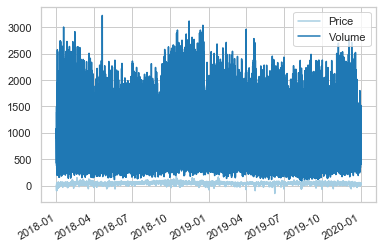

In [10]:
df.plot()